# AI-Driven Optimization of Public Transport Routes for Sustainable Cities (SDG 11)

This notebook uses unsupervised learning (clustering) to identify high-demand transport zones and possible route optimization patterns, contributing to SDG 11: Sustainable Cities and Communities.

## Step 1: Dataset Overview

Load and explore the public_transport.parquet dataset.

In [1]:
import pandas as pd

# Load parquet file
df = pd.read_parquet("../data/public_transport.parquet")

# Quick view
print("Shape:", df.shape)
df.head()

Shape: (21106698, 19)


,operating_day,line_id,stop_id,block_departure,block_arrival,trip_departure,trip_arrival,trip_stop_sum,pattern_index,pattern_departure_index,pattern_end_index,arrival,departure,stop_id_departure,stop_id_end,stop_position,trip_direction,vehicle_seats,passengers
0,04.03.20 00:00:00,74,167,13740,15180,13740,15180,17,0,0,16,13740,13740,167,565,1.0,1,99.0,0
1,04.03.20 00:00:00,74,52,13740,15180,13740,15180,17,1,0,16,13860,13860,167,565,1.0,1,99.0,2
2,04.03.20 00:00:00,74,54,13740,15180,13740,15180,17,2,0,16,13920,13920,167,565,1.0,1,99.0,2
3,04.03.20 00:00:00,74,55,13740,15180,13740,15180,17,3,0,16,13980,13980,167,565,1.0,1,99.0,2
4,04.03.20 00:00:00,74,56,13740,15180,13740,15180,17,4,0,16,14100,14100,167,565,1.0,1,99.0,2


In [2]:
# Understand the schema
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21106698 entries, 0 to 21106697
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   operating_day            object 
 1   line_id                  int32  
 2   stop_id                  int32  
 3   block_departure          int32  
 4   block_arrival            int32  
 5   trip_departure           int32  
 6   trip_arrival             int32  
 7   trip_stop_sum            int32  
 8   pattern_index            int32  
 9   pattern_departure_index  int32  
 10  pattern_end_index        int32  
 11  arrival                  int32  
 12  departure                int32  
 13  stop_id_departure        int32  
 14  stop_id_end              int32  
 15  stop_position            float64
 16  trip_direction           int32  
 17  vehicle_seats            float64
 18  passengers               int32  
dtypes: float64(2), int32(16), object(1)
memory usage: 1.7+ GB


,line_id,stop_id,block_departure,block_arrival,trip_departure,trip_arrival,trip_stop_sum,pattern_index,pattern_departure_index,pattern_end_index,arrival,departure,stop_id_departure,stop_id_end,stop_position,trip_direction,vehicle_seats,passengers
count,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110670e+07,2.110018e+07,2.110670e+07,2.110354e+07,2.110670e+07
mean,5.164147e+01,3.100124e+02,2.736079e+04,3.024776e+04,4.958118e+04,5.308961e+04,3.561358e+01,1.602709e+01,2.017750e-01,3.185365e+01,5.131122e+04,5.133000e+04,3.351493e+02,3.351045e+02,5.195714e+00,1.499215e+00,9.129923e+01,1.831538e+01
std,3.159664e+01,2.259106e+02,1.636573e+04,1.644653e+04,1.955963e+04,1.947800e+04,2.041994e+01,1.300550e+01,2.089480e+00,1.530423e+01,1.953201e+04,1.953191e+04,2.245000e+02,2.241884e+02,1.643501e+01,4.999994e-01,2.326671e+01,1.891674e+01
min,1.000000e+00,1.000000e+00,1.128000e+04,1.212000e+04,1.128000e+04,1.212000e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.128000e+04,1.128000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+01,8.100000e+01,1.842000e+04,2.083200e+04,3.270000e+04,3.636000e+04,2.000000e+01,6.000000e+00,0.000000e+00,1.900000e+01,3.450000e+04,3.450000e+04,9.500000e+01,9.500000e+01,1.000000e+00,1.000000e+00,9.300000e+01,4.000000e+00
50%,7.200000e+01,3.130000e+02,2.118000e+04,2.412000e+04,4.956000e+04,5.310000e+04,3.300000e+01,1.300000e+01,0.000000e+00,3.100000e+01,5.124000e+04,5.127000e+04,3.650000e+02,3.650000e+02,2.000000e+00,1.000000e+00,9.900000e+01,1.300000e+01
75%,7.400000e+01,5.010000e+02,2.838000e+04,3.228000e+04,6.420000e+04,6.780000e+04,4.400000e+01,2.400000e+01,0.000000e+00,4.200000e+01,6.600000e+04,6.603600e+04,5.120000e+02,5.080000e+02,2.000000e+00,2.000000e+00,1.070000e+02,2.700000e+01
max,1.020000e+02,8.000000e+02,9.864000e+04,1.034400e+05,1.074900e+05,1.086600e+05,2.100000e+02,7.300000e+01,5.700000e+01,7.300000e+01,1.086600e+05,1.086600e+05,8.000000e+02,8.000000e+02,9.500000e+01,2.000000e+00,1.200000e+02,2.620000e+02


The dataset contains columns like stop_id, passengers, line_id, etc. No lat/lon, so we'll use stop_id as a proxy for location (assuming stops are ordered geographically).

## Step 2: Data Preprocessing

Focus on numeric features for clustering: stop_id (location proxy) and passengers.

In [3]:
# Keep relevant columns
cols = ['stop_id', 'passengers']
df = df[cols].dropna()

# Remove outliers or unrealistic values
df = df[df['passengers'] > 0]

print("Shape after cleaning:", df.shape)

Shape after cleaning: (19189812, 2)


In [4]:
# Aggregate by stop_id
df_grouped = df.groupby('stop_id').agg(
    avg_passengers=('passengers', 'mean'),
    total_passengers=('passengers', 'sum')
).reset_index()

print("Aggregated shape:", df_grouped.shape)
df_grouped.head()

Aggregated shape: (792, 3)


,stop_id,avg_passengers,total_passengers
0,1,1.956627,812
1,2,29.026697,1004643
2,3,29.617558,1019851
3,4,21.425511,2352264
4,5,16.086569,483514


## Step 3: Feature Scaling & Clustering

Use K-Means to cluster stops based on location (stop_id) and demand (avg_passengers).

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_grouped[['stop_id', 'avg_passengers']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different cluster counts
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores.append((k, silhouette_score(X_scaled, labels)))

# Choose the best k (highest silhouette)
best_k = max(scores, key=lambda x: x[1])[0]
print(f"Best number of clusters: {best_k}")
print("Scores:", scores)

Best number of clusters: 4
Scores: [(2, 0.3803645897835092), (3, 0.447797347718971), (4, 0.48055811282728667), (5, 0.4713386321652851), (6, 0.4191861132636065), (7, 0.4133736701057918), (8, 0.4280600029751195), (9, 0.43324939077888575), (10, 0.43398506475264076)]


In [6]:
# Fit the model with best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_grouped['cluster'] = kmeans.fit_predict(X_scaled)

df_grouped.head()

,stop_id,avg_passengers,total_passengers,cluster
0,1,1.956627,812,0
1,2,29.026697,1004643,2
2,3,29.617558,1019851,2
3,4,21.425511,2352264,2
4,5,16.086569,483514,2


## Step 4: Visualization

Since no geospatial data, we'll plot clusters using stop_id as x-axis and avg_passengers as y-axis.

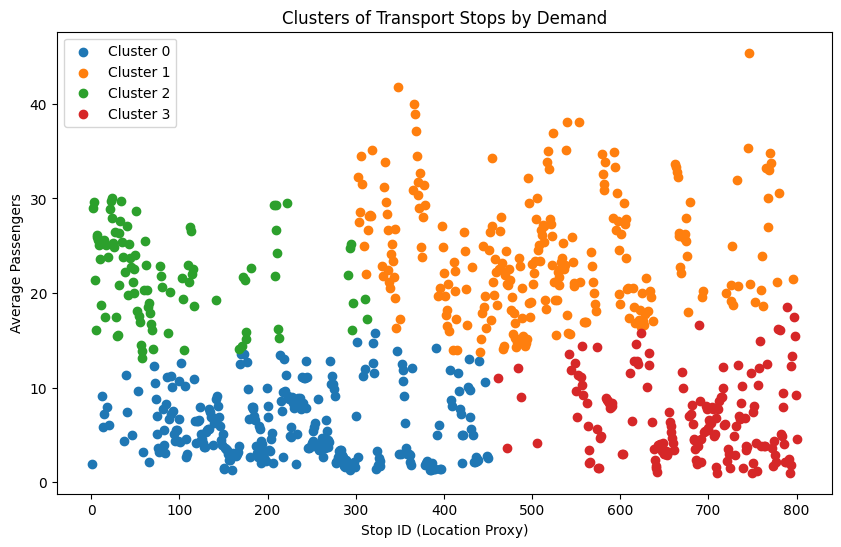

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
for cluster in range(best_k):
    cluster_data = df_grouped[df_grouped['cluster'] == cluster]
    plt.scatter(cluster_data['stop_id'], cluster_data['avg_passengers'], label=f'Cluster {cluster}')

plt.xlabel('Stop ID (Location Proxy)')
plt.ylabel('Average Passengers')
plt.title('Clusters of Transport Stops by Demand')
plt.legend()
plt.show()

## Step 5: Evaluate & Interpret

Interpret the clusters and compute metrics.

In [8]:
# Silhouette score
sil = silhouette_score(X_scaled, df_grouped['cluster'])
print(f"Silhouette Score: {sil}")

# Cluster stats
cluster_stats = df_grouped.groupby('cluster').agg(
    count=('stop_id', 'count'),
    avg_passengers=('avg_passengers', 'mean'),
    total_passengers=('total_passengers', 'sum')
)
print(cluster_stats)

Silhouette Score: 0.48055811282728667
         count  avg_passengers  total_passengers
cluster                                         
0          277        5.928261          25172417
1          253       23.921474         211733867
2           95       21.767468         137175500
3          167        6.729613          12495449


Interpretation:
- Clusters with high avg_passengers indicate high-demand zones.
- Suggest optimizing routes by increasing frequency in high-demand clusters.

## DBSCAN Comparison

In [9]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_grouped['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

print("DBSCAN clusters:", df_grouped['dbscan_cluster'].nunique())
df_grouped.head()

DBSCAN clusters: 2


,stop_id,avg_passengers,total_passengers,cluster,dbscan_cluster
0,1,1.956627,812,0,0
1,2,29.026697,1004643,2,0
2,3,29.617558,1019851,2,0
3,4,21.425511,2352264,2,0
4,5,16.086569,483514,2,0
